In [2]:
## Usual suspects - The import lineup
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Casino Case Study

A bag has 3 red and 2 blue balls.
You pick a ball, write its colour, and put it back in the bag. This is done 4 times in total.
If all 4 times, the red ball was drawn, you win Rs 150.
Would you play this game?

In [37]:
trial = np.random.choice(["R", "R", "R", "B", "B"], size=4)
num_red = np.count_nonzero(trial == "R")

print(trial)
print(num_red)

['B' 'B' 'R' 'R']
2


/Users/dhruv/miniconda3/envs/def/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

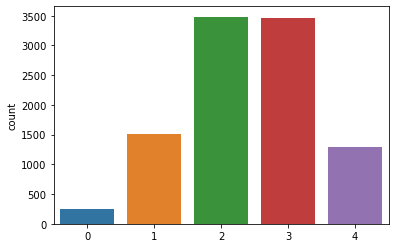

In [39]:
n = 10000
trials = []
for i in range(n+1):
    trial = np.random.choice(["R", "R", "R", "B", "B"], size=4)
    num_red = np.count_nonzero(trial == "R")
    trials.append(num_red)

sns.countplot(trials)

In [17]:
counts = {}
for t in trials:
    if t in counts:
        counts[t] += 1
    else:
        counts[t] = 1

In [18]:
expectation = 0
for i in range(len(counts)):
    expectation += i * counts[i]
    print(i, counts[i])
expectation = expectation / len(trials)
print(expectation)

0 246
1 1567
2 3438
3 3441
4 1308
2.3998


In [15]:
191/75

2.546666666666667

In [23]:
p_x_2 = m.comb(4, 2) * (2/5)**2 * (3/5)**2
p_x_2

0.3456000000000001

In [24]:
from scipy.stats import binom

n = 4
k = 2
p = 3/5

print(binom.pmf(n=n, k=k, p=p))

0.34560000000000024


## Plotting the Probability mass function

/Users/dhruv/miniconda3/envs/def/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

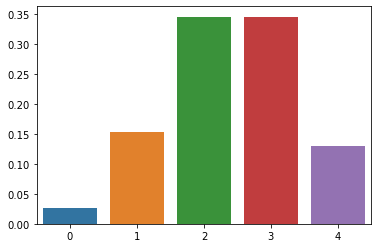

In [29]:
X = [0, 1, 2, 3, 4]
P = []

n = len(X)-1
p = 3/5

for k in X:
    P.append(binom.pmf(n=n, k=k, p=p))

sns.barplot(X, P)

In [32]:
p_y_150 = binom.pmf(n=4, k=4, p=(3/5))
e_y = 150 * p_y_150 + (-10) * (1 - p_y_150)

In [33]:
e_y

10.735999999999997

/Users/dhruv/miniconda3/envs/def/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

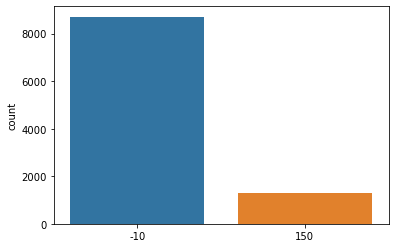

In [45]:
n = 10000
trials = []
for i in range(n+1):
    trial = np.random.choice(["R", "R", "R", "B", "B"], size=4)
    num_red = np.count_nonzero(trial == "R")
    if num_red == 4:
        trials.append(150)
    else:
        trials.append(-10)
sns.countplot(trials)

In [46]:
counts = {}
for t in trials:
    if t in counts:
        counts[t] += 1
    else:
        counts[t] = 1

In [47]:
counts

{150: 1294, -10: 8707}

In [48]:
money_lost = counts[-10] * -10
money_won = counts[150] * 150

print("Money won: ", money_won)
print("Money lost: ", money_lost)

print("Overall: ", money_lost + money_won)
print("Overall: ", (money_lost + money_won) / len(trials) )

Money won:  194100
Money lost:  -87070
Overall:  107030
Overall:  10.701929807019297


In [49]:
n = 2
p = 1/2

print(binom.expect(args=(n, p)))

1.0000000000000002


/Users/dhruv/miniconda3/envs/def/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

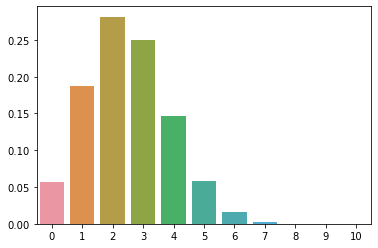

In [50]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
P = []

n = len(X)-1
p = 1/4

for k in X:
    P.append(binom.pmf(n=n, k=k, p=p))

sns.barplot(X, P)

/Users/dhruv/miniconda3/envs/def/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

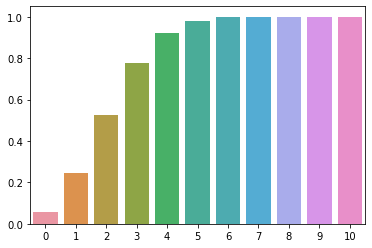

In [51]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
P = []

n = len(X)-1
p = 1/4

for k in X:
    P.append(binom.cdf(n=n, k=k, p=p))

sns.barplot(X, P)